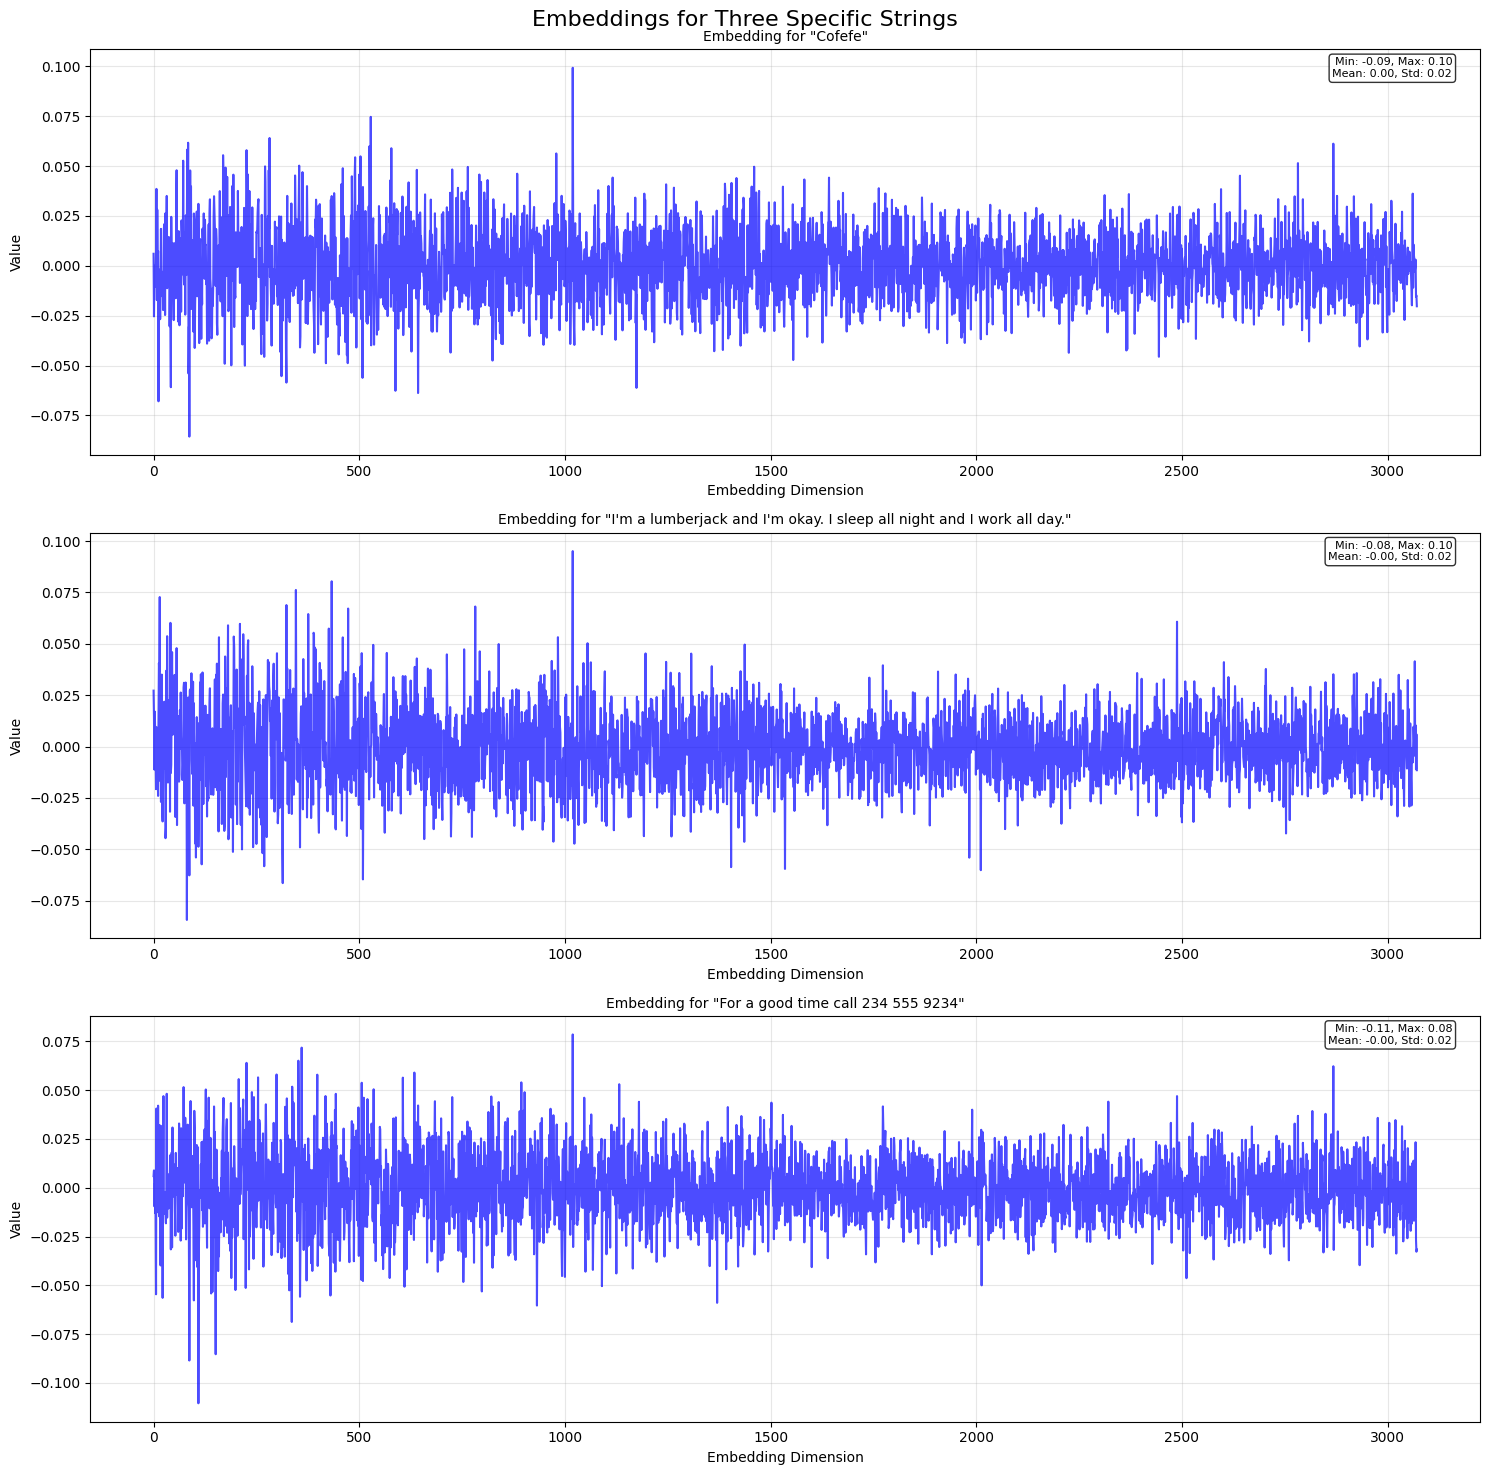


Embedding 1 for 'Cofefe':
Length: 3072
Min value: -0.0857
Max value: 0.0993
Mean value: 0.0003
Standard deviation: 0.0180

Embedding 2 for 'I'm a lumberjack and I'm okay. I sleep all night and I work all day.':
Length: 3072
Min value: -0.0844
Max value: 0.0951
Mean value: -0.0002
Standard deviation: 0.0180

Embedding 3 for 'For a good time call 234 555 9234':
Length: 3072
Min value: -0.1105
Max value: 0.0786
Mean value: -0.0003
Standard deviation: 0.0180


In [3]:
import ollama
import matplotlib.pyplot as plt
import numpy as np

import sys
from openai import OpenAI
from dotenv import load_dotenv
import os

load_dotenv('../.env')
OPENAI_KEY = os.getenv('OPENAI_KEY')
client = OpenAI(api_key=OPENAI_KEY)

def generate_embedding(text):
    response = client.embeddings.create(input=text, model="text-embedding-3-large")
    res = response.data[0].embedding
    return res

# def generate_embedding(text):
#     response = ollama.embeddings(model='snowflake-arctic-embed', prompt=text)
#     return response['embedding']

def plot_embedding(embedding, text, ax):
    ax.plot(embedding, 'b-', alpha=0.7)
    ax.set_title(f'Embedding for "{text}"', fontsize=10)
    ax.set_ylabel('Value')
    ax.set_xlabel('Embedding Dimension')
    ax.grid(True, alpha=0.3)
    
    # Add statistics to the plot
    stats = f'Min: {min(embedding):.2f}, Max: {max(embedding):.2f}\nMean: {np.mean(embedding):.2f}, Std: {np.std(embedding):.2f}'
    ax.text(0.98, 0.98, stats, transform=ax.transAxes, ha='right', va='top', fontsize=8, 
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Three specific strings
strings = [
    "Cofefe",
    "I'm a lumberjack and I'm okay. I sleep all night and I work all day.",
    #"19237410239"
    "For a good time call 234 555 9234"
]

# Generate embeddings
embeddings = [generate_embedding(s) for s in strings]

# Create plots
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
fig.suptitle('Embeddings for Three Specific Strings', fontsize=16)

for embedding, text, ax in zip(embeddings, strings, axes):
    plot_embedding(embedding, text, ax)

plt.tight_layout()
plt.show()

# Print some additional information
for i, (embedding, text) in enumerate(zip(embeddings, strings), 1):
    print(f"\nEmbedding {i} for '{text}':")
    print(f"Length: {len(embedding)}")
    print(f"Min value: {min(embedding):.4f}")
    print(f"Max value: {max(embedding):.4f}")
    print(f"Mean value: {np.mean(embedding):.4f}")
    print(f"Standard deviation: {np.std(embedding):.4f}")